# Noise Filtering Using SVD

This Python program demonstrates the generation of a synthetic dataset, the application of Singular Value Decomposition (SVD), and noise filtering techniques to clean the data.

## Process Overview:

1. **Dataset Generation:**
   - A synthetic dataset is created using a combination of damped cosine and sine waves.
   - The true data matrix (`X`) is formed by the outer product of three matrices: `Utrue`, `Strue`, and `Vtrue.T`.

2. **Noise Addition:**
   - Gaussian noise is added to the true data to create a noisy dataset (`Xnoisy`).

3. **SVD and Noise Filtering:**
   - SVD is applied to the noisy data to decompose it into its singular vectors and values.
   - A cutoff threshold is determined using a heuristic formula to identify significant singular values.
   - The data is then reconstructed using only the significant singular vectors and values, resulting in a 'cleaned' dataset (`Xclean`).

4. **Energy Capture:**
   - The cumulative sum of the singular values is calculated to determine the number of components needed to capture 90% of the energy in the data.
   - A reduced dataset (`X90`) is reconstructed that captures 90% of the total energy.

5. **Visualization:**
   - The true data, noisy data, cleaned data, and 90% energy data are displayed.
   - Singular values are plotted on a semi-logarithmic scale to visualize the cutoff threshold and energy capture.


- **Singular Values Matrix (`Strue`):**
  - A diagonal matrix with predetermined singular values.



The code includes detailed plotting sections to provide visual insight into the various steps of the process.




In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a true synthetic dataset
t = np.arange(-3, 3, 0.01).reshape(-1, 1)  # Time vector
# Utrue is formed by combining a damped cosine and sine waves
Utrue = np.cos(17*t) * np.exp(-t**2)  # First column of Utrue
Utrue = np.hstack((Utrue, np.sin(11*t)))  # Add second column to Utrue
Strue = np.array([[2, 0], [0, 0.5]])  # Singular values matrix for true data
# Vtrue is formed by combining a damped sine and cosine waves
Vtrue = np.sin(5*t) * np.exp(-t**2)  # First row of Vtrue
Vtrue = np.hstack((Vtrue, np.cos(13*t)))  # Add second row to Vtrue


- **Damped Oscillations for `Utrue` and `Vtrue`:**
  - `Utrue` and `Vtrue` are created by combining damped oscillations using the following equations:
    - $ U_{true} = \cos(17t) \cdot e^{-t^2} $
    - $ V_{true} = \sin(5t) \cdot e^{-t^2} $


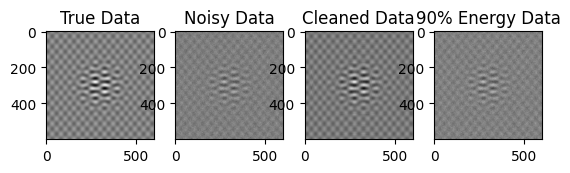

In [3]:

# True data matrix
X = Utrue @ Strue @ Vtrue.T
plt.subplot(1, 4, 1)
plt.imshow(X, cmap='gray')
plt.title('True Data')

# Add noise to the true data
sigma = 1  # Standard deviation of the noise
Xnoisy = X + sigma * np.random.randn(*X.shape)  # Add Gaussian noise
plt.subplot(1, 4, 2)
plt.imshow(Xnoisy, cmap='gray')
plt.title('Noisy Data')

# Perform Singular Value Decomposition (SVD) and truncate small singular values
U, S, Vt = np.linalg.svd(Xnoisy, full_matrices=False)  # Compute the SVD
N = Xnoisy.shape[0]  # Number of samples in the data
cutoff = (4/np.sqrt(3)) * np.sqrt(N) * sigma  # Calculate the cutoff threshold
r = np.max(np.where(np.diag(S) > cutoff)[0])  # Find rank for truncation
Xclean = U[:, :r+1] @ np.diag(S[:r+1]) @ Vt[:r+1, :]  # Reconstruct the clean data
plt.subplot(1, 4, 3)
plt.imshow(Xclean, cmap='gray')
plt.title('Cleaned Data')

# Calculate cumulative energy and truncate to capture 90% of the energy
cdS = np.cumsum(S) / np.sum(S)  # Calculate cumulative sum of singular values
r90 = np.where(cdS > 0.90)[0][0]  # Find rank to capture 90% of the energy
X90 = U[:, :r90+1] @ np.diag(S[:r90+1]) @ Vt[:r90+1, :]  # Reconstruct data for 90% energy
plt.subplot(1, 4, 4)
plt.imshow(X90, cmap='gray')
plt.title('90% Energy Data')

# Display the figure with all subplots
plt.show()


The full expansion of a matrix $ X $ using `Singular Value Decomposition (SVD)`. It's typically written as follows:

$ X = \sum_{k=1}^{m} \sigma_k u_k v_k^* = \sigma_1 u_1 v_1^* + \sigma_2 u_2 v_2^* + \cdots + \sigma_m u_m v_m^* $

We will `truncate` this matrix, for that we need to first find the cutoff threshold.

- **Find the cutoff threshold:**
  - The cutoff threshold is calculated using the formula:
    - $ \text{cutoff} = \left(\frac{4}{\sqrt{3}}\right) \sqrt{N} \sigma $
  - Where $ N $ is the `number of samples` and $ \sigma $ is the `standard deviation` of the noise.

How we determine the important singular values and truncate $ X $:

1. **Compute the SVD**: We start by computing the SVD of the noisy data matrix $ X $, obtaining the `singular values and vectors`.

2. **Find the cutoff threshold**: We set a `threshold` to determine the important singular values. This threshold can be a fixed value or calculated based on some criteria, like the standard deviation of noise. In the provided code, the cutoff is computed based on the noise level and the size of the matrix.

3. **Determine the rank for truncation (r)**: The rank $ r $ is found by locating the last singular value greater than the cutoff threshold. This rank signifies how many terms in the sum we consider significant.

4. **Truncate the SVD**: We approximate $ X $ by summing only up to the $ r $-th term:

$ X_{\text{approx}} = \sum_{k=1}^{r} \sigma_k u_k v_k^* $

5. **Reconstruct the truncated matrix**: We construct the clean data matrix $ X_{\text{clean}} $ using `only` the `significant singular values and vectors`, effectively ignoring the rest which are deemed to be noise or less important.


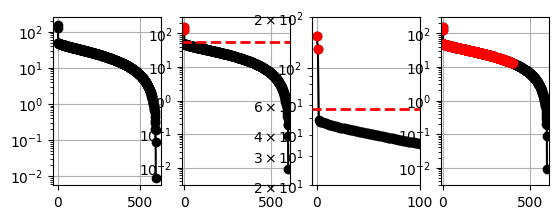

In [5]:
# Plot singular values on a semi-logarithmic scale
plt.subplot(2, 4, 5)
plt.semilogy(S, '-ok', linewidth=1.5)  # Plot singular values
plt.grid(True)

# Plot singular values with a cutoff threshold to show which values are truncated
plt.subplot(2, 4, 6)
plt.semilogy(S, '-ok', linewidth=1.5)  # Plot all singular values
plt.semilogy(S[:r+1], 'or', linewidth=1.5)  # Highlight the singular values above the cutoff
plt.plot([-20, N+20], [cutoff, cutoff], 'r--', linewidth=2)  # Cutoff threshold line
plt.axis([-10, 610, .003, 300])  # Set axis limits
plt.grid(True)

# Zoomed-in version of the previous plot to focus on the larger singular values
plt.subplot(2, 4, 7)
plt.semilogy(S, '-ok', linewidth=1.5)  # Plot singular values
plt.semilogy(S[:r+1], 'or', linewidth=1.5)  # Highlight the singular values above the cutoff
plt.plot([-20, N+20], [cutoff, cutoff], 'r--', linewidth=2)  # Cutoff threshold line
plt.axis([-5, 100, 20, 200])  # Set axis limits to zoom in
plt.grid(True)

# Plot singular values with a cutoff to capture 90% energy
plt.subplot(2, 4, 8)
plt.semilogy(S, '-ok', linewidth=1.5)  # Plot singular values
plt.semilogy(S[:r90], 'or', linewidth=1.5)  # Highlight the singular values that capture 90% energy
plt.axis([-10, 610, .003, 300])  # Set axis limits
plt.grid(True)

# When you are ready to show the plots

plt.show()


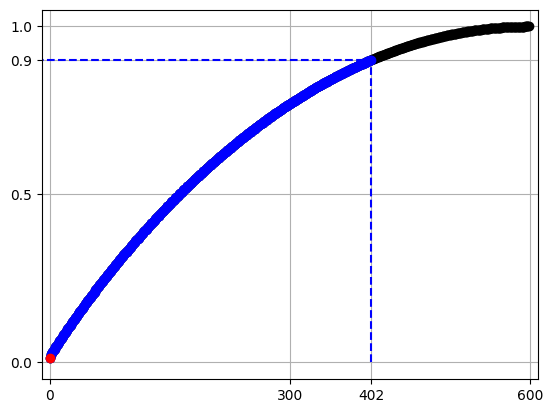

In [12]:
# New figure for cumulative energy
plt.figure()
plt.plot(cdS, '-ok', linewidth=1.5)
plt.plot(cdS[:r90], 'ob', linewidth=1.5)
plt.plot(cdS[:r], 'or', linewidth=1.5)
plt.gca().set_xticks([0, 300, r90, 600])
plt.gca().set_yticks([0, 0.5, 0.9, 1.0])
plt.xlim([-10, 610])
plt.grid(True)
plt.plot([r90, r90, -10], [0, 0.9, 0.9], 'b--', linewidth=1.5)